In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# import just the Exeter data
exeter_data = pd.read_csv("../data/Exeter_city_only.csv", header = 0)

In [3]:
# lets print out the road names for plotting points
exeter_data["StartJunction"].unique()

exeter_data[["StartJunction", "EndJunction"]][0:16]

,StartJunction,EndJunction
0,Sannerville Way Rndbt,Glasshouse Lane
1,30,29
2,Bridge road/Sannerville Way Rndbt,A38 Mid Junction
3,A3015 Western Way,B3183 New North Road
4,B3123,A3015 Nr Frog St
5,A30,/B3123
6,A3015 Topsham Road,A3015
7,M5 Jct 30,M5
8,A377,M5 Jct 31
9,B3183 New North Road,A396


In [4]:
# group by year
group = exeter_data.groupby(['AADFYear'])

# make a new dataframe of a few columns of interest
data_group = group["CarsTaxis"].agg(['mean','std'])

print(data_group)

                mean           std
AADFYear                          
2000      23572.8750  12325.731784
2001      24039.1250  13581.805440
2002      24667.1875  13568.449985
2003      24666.0625  12785.272934
2004      25397.0000  12478.314550
2005      26253.4375  16276.850586
2006      26490.1875  15447.334204
2007      25157.4375  13296.810106
2008      26156.0000  16220.599187
2009      26724.5625  16662.099177
2010      25407.0000  14905.848718
2011      25718.3750  14886.127804
2012      25115.1250  14710.797463
2013      25710.2500  15038.700010
2014      25020.3125  14900.100906


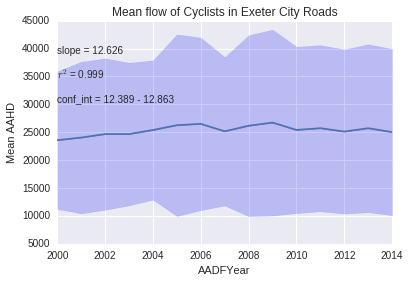

In [6]:
# plot these cycle stats

ax = sns.tsplot(data=data_group['mean'], time = data_group.index)

ax.set(ylabel="Mean AAHD", title = "Mean flow of Cyclists in Exeter City Roads")


plt.fill_between(data_group.index, (data_group['mean'] + data_group['std']), 
                 (data_group['mean'] - data_group['std']), color = 'b', alpha = 0.2) 

# to place the point half way up the page, take the maximum y value and /2
plot_y_slope = (max(data_group['mean']) + max(data_group['std']))*0.9
# to place the point half way up the page, take the maximum y value and /2
plot_y_r = (max(data_group['mean']) + max(data_group['std']))*0.8
# to place the point half way up the page, take the maximum y value and /2
plot_y_conf = (max(data_group['mean']) + max(data_group['std']))*0.7

# Annotate with the slope and confidence interval
plt.text(2000,int(plot_y_slope),"slope = %s"%str(round(f.params[0],3)))
plt.text(2000,int(plot_y_r),"$r^2$ = %s"%str(round(f.rsquared,3))) 
plt.text(2000,int(plot_y_conf),"conf_int = %s - %s"%(str(round(f.conf_int()[0][0],3)), str(round(f.conf_int()[1][0],3))))

fig = ax.get_figure()

fig.savefig('../plots/cyclist_tseries.pdf')

In [7]:
print(f.params[0])
print(f.conf_int()[0][0]) # both of these confidence intervals are above 0 so we can be confident that it is +ve
print(f.rsquared)

12.6260339283
12.3894462761
0.998932553209


In [8]:
transport = ["Motorcycles","CarsTaxis","BusesCoaches","LightGoodsVehicles","AllHGVs", "AllMotorVehicles"]

for transport_type in transport:
    
    data_group = group[transport_type].agg(['mean','std'])
    
    print(transport_type)
    print(data_group["mean"][0:10])


Motorcycles
AADFYear
2000    357.1875
2001    351.4375
2002    288.9375
2003    299.5000
2004    380.4375
2005    335.4375
2006    337.3125
2007    315.0000
2008    341.9375
2009    345.9375
Name: mean, dtype: float64
CarsTaxis
AADFYear
2000    23572.8750
2001    24039.1250
2002    24667.1875
2003    24666.0625
2004    25397.0000
2005    26253.4375
2006    26490.1875
2007    25157.4375
2008    26156.0000
2009    26724.5625
Name: mean, dtype: float64
BusesCoaches
AADFYear
2000    199.2500
2001    197.8125
2002    197.1875
2003    153.7500
2004    160.6250
2005    181.3750
2006    232.6875
2007    201.5000
2008    185.3750
2009    201.3125
Name: mean, dtype: float64
LightGoodsVehicles
AADFYear
2000    3301.3125
2001    3473.4375
2002    3777.8125
2003    3955.9375
2004    4055.9375
2005    4064.7500
2006    4509.0000
2007    4528.3125
2008    4453.5625
2009    4076.1250
Name: mean, dtype: float64
AllHGVs
AADFYear
2000    1809.4375
2001    1835.8125
2002    1843.2500
2003    1737.3125
200

In [20]:
transport = ["PedalCycles","Motorcycles","CarsTaxis","BusesCoaches","LightGoodsVehicles","AllHGVs", "AllMotorVehicles"]

for transport_type in transport:
    
    
    group = exeter_data.groupby(['AADFYear'])
      
    data_group = group[transport_type].agg(['median','std'])
    
    print(data_group["median"][0:10])
    

AADFYear
2000    94.5
2001    90.5
2002    56.0
2003    82.0
2004    67.0
2005    44.5
2006    81.5
2007    54.5
2008    61.0
2009    98.0
Name: median, dtype: float64
AADFYear
2000    302.0
2001    299.5
2002    292.5
2003    311.0
2004    323.5
2005    270.0
2006    279.5
2007    219.0
2008    226.5
2009    284.0
Name: median, dtype: float64
AADFYear
2000    19081.0
2001    20071.0
2002    21188.5
2003    21717.5
2004    21558.0
2005    19857.5
2006    21274.5
2007    21339.5
2008    22157.0
2009    23094.0
Name: median, dtype: float64
AADFYear
2000    135.5
2001    151.5
2002    152.0
2003    126.0
2004    107.5
2005    100.0
2006    131.0
2007    140.5
2008    119.0
2009    129.0
Name: median, dtype: float64
AADFYear
2000    2495.5
2001    2549.0
2002    2692.5
2003    2926.5
2004    3241.5
2005    2975.0
2006    3271.0
2007    3371.0
2008    3532.0
2009    3013.0
Name: median, dtype: float64
AADFYear
2000    1116.5
2001    1137.5
2002    1098.5
2003    1122.5
2004    1129.0
2005  

<bound method OLSResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f3ea1760850>>
<bound method OLSResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f3ea0abf610>>
<bound method OLSResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f3ea0ce5e90>>
<bound method OLSResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f3ea1d25410>>
<bound method OLSResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f3ea15b7cd0>>
<bound method OLSResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f3ea1f98d90>>
<bound method OLSResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f3ea16dbc90>>


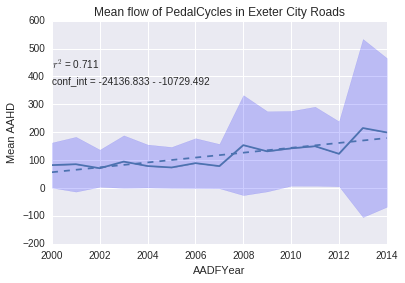

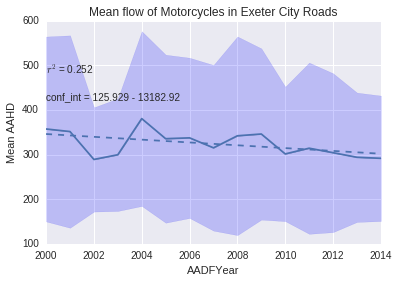

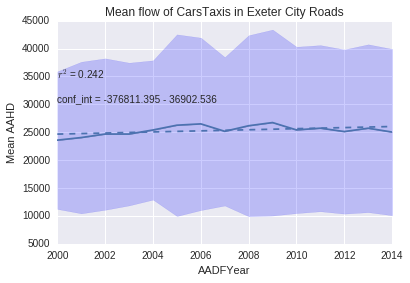

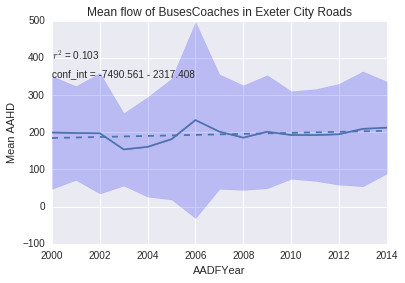

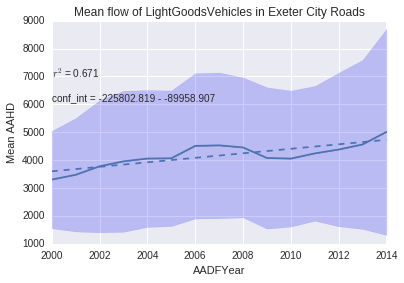

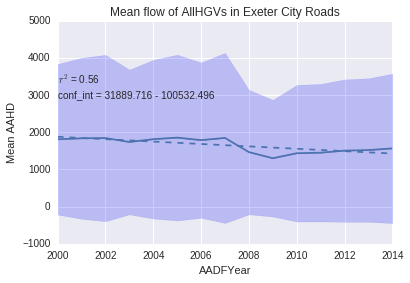

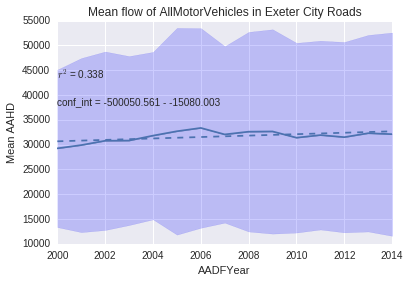

In [59]:
# make the same plots for the other parameters

transport = ["PedalCycles","Motorcycles","CarsTaxis","BusesCoaches","LightGoodsVehicles","AllHGVs", "AllMotorVehicles"]

for transport_type in transport:
    
    
    group = exeter_data.groupby(['AADFYear'])
      
    data_group = group[transport_type].agg(['mean','std'])
    
    #print(data_group["mean"])
        
    # fit a regression line
    model = sm.OLS(data_group["mean"],sm.add_constant(exeter_data["AADFYear"].unique()))

    f = model.fit()
    
    # Plot the data
    
    plt.figure()
    
    ax = sns.tsplot(data=data_group['mean'], time = data_group.index)

    ax.set(ylabel="Mean AAHD", title = "Mean flow of %s in Exeter City Roads" %transport_type)
    
    plt.plot(f.fittedvalues,'--')

    plt.fill_between(data_group.index, (data_group['mean'] + data_group['std']), 
                 (data_group['mean'] - data_group['std']), color = 'b', alpha = 0.2) 
    
    # Annotate with the slope and confidence interval
    
    # to place the point half way up the page, take the maximum y value and /2
    #plot_y_slope = (max(data_group['mean']) + max(data_group['std']))*0.9
    # to place the point half way up the page, take the maximum y value and /2
    plot_y_r = (max(data_group['mean']) + max(data_group['std']))*0.8
    # to place the point half way up the page, take the maximum y value and /2
    plot_y_conf = (max(data_group['mean']) + max(data_group['std']))*0.7
    
    
    
    print(f.summary)
    #print(round(f.rsquared,3))
    
    
    
    # Annotate with the slope and confidence interval
    #plt.text(2000,int(plot_y_slope),"slope = %s"%str(round(f.params[0],3)))
    plt.text(2000,int(plot_y_r),"$r^2$ = %s"%str(round(f.rsquared,3))) 
    plt.text(2000,int(plot_y_conf),"conf_int = %s - %s"%(str(round(f.conf_int()[0][0],3)), 
                                                         str(round(f.conf_int()[1][0],3))))
    

In [49]:
group = exeter_data.groupby(['AADFYear']).mean()
print(group["AllHGVs"])

AADFYear
2000    1809.4375
2001    1835.8125
2002    1843.2500
2003    1737.3125
2004    1811.8750
2005    1854.6250
2006    1787.1250
2007    1846.3750
2008    1465.2500
2009    1301.1250
2010    1434.3750
2011    1450.1250
2012    1504.7500
2013    1520.0625
2014    1565.1875
Name: AllHGVs, dtype: float64


In [44]:
print(m,b)

(-32.167410714286895, 66211.105803573824)


In [62]:
# make a new dataframe with just the figures
transport = ["PedalCycles","Motorcycles","CarsTaxis","BusesCoaches","LightGoodsVehicles","AllHGVs", "AllMotorVehicles"]
parameters = ["slope", "rsquared", "conf_int_0", "conf_int_1","relative"]

df = pd.DataFrame(index=transport, columns=parameters)
df = df.fillna(0.000000)

# Make an empty dataframe to store values.

for mode in transport:
    
    group = exeter_data.groupby(['AADFYear'])
      
    data_group = group[mode].agg(['mean','std'])
    
    model = sm.OLS(data_group["mean"],sm.add_constant(exeter_data["AADFYear"].unique()))

    f = model.fit()
    
    # gives the 
    if f.params[0] < 0:
        relative = (max(f.fittedvalues) - min(f.fittedvalues))/ round(min(f.fittedvalues),6)
    if f.params[0] > 0:
        relative = (max(f.fittedvalues) - min(f.fittedvalues))/ round(max(f.fittedvalues),6)
      
    print(max(f.fittedvalues),min(f.fittedvalues))
    
    print((max(f.fittedvalues) - min(f.fittedvalues)) / round(min(f.fittedvalues),5))
    
    df.loc[mode]["slope"] = round(f.params[0],3)
    
    df.loc[mode]["rsquared"] = round(f.rsquared,3)
    
    df.loc[mode]["conf_int_0"] = round(f.conf_int()[0][0],3)
    
    df.loc[mode]["conf_int_1"] = round(f.conf_int()[1][0],3)
    
    #df.loc[mode]["relative"] = round(relative,5)
    
    df.loc[mode]["relative"] = round(relative,10)
    
print(df)
    

(178.99739583333212, 56.569270833329938)
2.16421610178
(345.94218749999891, 301.78281249999873)
0.146328331292
(26020.807812500076, 24658.517187500081)
0.0552462507986
(203.80260416666579, 184.40572916666497)
0.105185858379
(4728.0583333332033, 3597.7083333331975)
0.314186114137
(1876.2843750000102, 1425.9406250000029)
0.315822230271
(32680.44010416657, 30662.843229166581)
0.0657994061368
                         slope  rsquared  conf_int_0  conf_int_1  relative
PedalCycles         -17433.163     0.711  -24136.833  -10729.492  2.164216
Motorcycles           6654.424     0.252     125.929   13182.920  0.127650
CarsTaxis          -169954.429     0.242 -376811.395   36902.536  0.055246
BusesCoaches         -2586.576     0.103   -7490.561    2317.408  0.105186
LightGoodsVehicles -157880.863     0.671 -225802.819  -89958.907  0.314186
AllHGVs              66211.106     0.560   31889.716  100532.496  0.240019
AllMotorVehicles   -257565.282     0.338 -500050.561  -15080.003  0.065799


In [61]:
df
# Slope of trend line, resquared and conf interval and relative trend for each mode type

,slope,rsquared,conf_int_0,conf_int_1,relative
PedalCycles,-17433.163,0.711,-24136.833,-10729.492,2.164216
Motorcycles,6654.424,0.252,125.929,13182.920,0.127650
CarsTaxis,-169954.429,0.242,-376811.395,36902.536,0.055246
BusesCoaches,-2586.576,0.103,-7490.561,2317.408,0.105186
LightGoodsVehicles,-157880.863,0.671,-225802.819,-89958.907,0.314186
AllHGVs,66211.106,0.560,31889.716,100532.496,0.240019
AllMotorVehicles,-257565.282,0.338,-500050.561,-15080.003,0.065799


All of the slopes are +ve, to varying degrees which indicated that overall the roads are experiencing an increased load over the past 14 years. 

In order to compare the trends against each other we need to compute the relative trend. 

All of the relative trends are pretty much the same. As I don't think they measure these roads year on year, it must be a factor when they compute AADF - they are all increased by the same amount. So looking at specific trends in Exeter is probably not much use. 

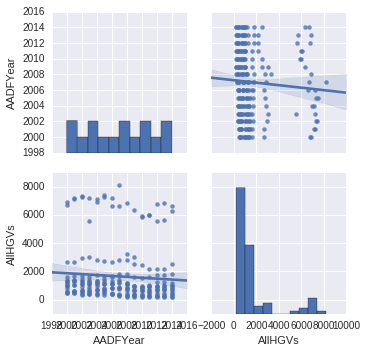

In [13]:
ax = sns.pairplot(exeter_data[['AADFYear', 'AllHGVs']],kind = "reg")

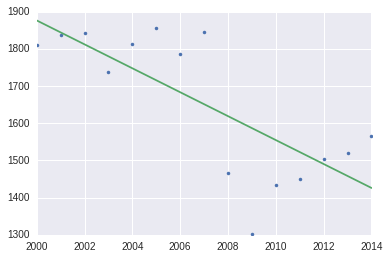

In [43]:
group = exeter_data.groupby(['AADFYear'])
data_group = group["AllHGVs"].agg(['mean','std'])


# fit with np.polyfit
m, b = np.polyfit(exeter_data["AADFYear"].unique(), data_group["mean"], 1)

plt.plot(exeter_data["AADFYear"].unique(), data_group["mean"], '.')
plt.plot(exeter_data["AADFYear"].unique(), m*exeter_data["AADFYear"].unique() + b, '-')
#plt.text(20,6,"r = %s"%str(r))
#plt.text(20,5.5,"$r^2$ = %s"%str(results.rsquared))  # from results.rsquared



In [37]:
# make the same plots for the other parameters

transport = ["PedalCycles","Motorcycles","CarsTaxis","BusesCoaches","LightGoodsVehicles","AllHGVs", "AllMotorVehicles"]

for transport_type in transport:
    
    
    group = exeter_data.groupby(['AADFYear'])
      
    data_group = group[transport_type].agg(['mean','std'])
    
    print(group[transport_type])
    
        
    # fit a regression line
    #res = ols(y=df['A'], x=df[['B','C']])
    
    regression = pd.ols(y = data_group["mean"], x = exeter_data["AADFYear"].unique())
    regression.summary
    
    trend = regression.predict(beta=regression.beta) # slicing to only use last 30 points
    data = pd.DataFrame(index=exeter_data["AADFYear"].unique(), data={'y':exeter_data["AADFYear"].unique() , 'trend':trend})
    data.plot() # add kwargs for title and other layout/design aspects
    plt.show() # or plt.gcf().savefig(path)
    
    

Exception: Invalid RHS type: <type 'numpy.ndarray'>

In [26]:
exeter_data["AADFYear"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014])

In [29]:
data_group["mean"].tolist()

[82.0625,
 85.25,
 70.875,
 94.625,
 78.75,
 73.625,
 89.125,
 78.5,
 153.6875,
 131.4375,
 142.1875,
 149.75,
 122.625,
 215.0,
 199.25]